In [1]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('exercise.csv')
df.head()

,User_ID,Gender,Age,Height(cm),Weight(Kg),Duration(min.),Heart_Rate,Body_Temp,Calories
0,10001159,female,67,176,74,12,103,39.6,76
1,10001607,female,34,178,79,19,96,40.6,93
2,10005485,female,38,178,77,14,82,40.5,49
3,10005630,female,39,169,66,8,90,39.6,36
4,10006441,male,23,169,73,25,102,40.7,122


In [5]:
df_drop = pd.read_csv('exercise.csv',usecols=['Age','Height(cm)','Duration(min.)','Heart_Rate'])

In [6]:
#a = {'female':1,'male':0}
#df_drop.Gender = df_drop.Gender.map(a)

In [10]:
df_drop.head()


,Age,Height(cm),Duration(min.),Heart_Rate
0,67,176,12,103
1,34,178,19,96
2,38,178,14,82
3,39,169,8,90
4,23,169,25,102


In [11]:
df_drop.shape

(15000, 4)

In [12]:
X = df_drop
y = df.Calories


In [13]:
from sklearn.preprocessing import StandardScaler
mms = StandardScaler()
mms.fit_transform(X,y);

In [14]:
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Calories   R-squared (uncentered):                   0.977
Model:                            OLS   Adj. R-squared (uncentered):              0.977
Method:                 Least Squares   F-statistic:                          1.581e+05
Date:                Sun, 17 Oct 2021   Prob (F-statistic):                        0.00
Time:                        10:46:33   Log-Likelihood:                         -63439.
No. Observations:               15000   AIC:                                  1.269e+05
Df Residuals:                   14996   BIC:                                  1.269e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.4471      0.008     56.341      0.000       0.432       0.463
Height(cm)        -0.3620      0.008    -47.275      0.000      -0.377      -0.347
Duration(min.)     6.7367      0.025    274.695      0.000       6.689       6.785
Heart_Rate         0.3085      0.017     18.299      0.000       0.275       0.342
==============================================================================
Omnibus:                     3176.098   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9540.275
Skew:                           1.097   Prob(JB):                         0.00
Kurtosis:                       6.232   Cond. No.                         43.3
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10500, 4)
(4500, 4)
(10500,)
(4500,)


In [16]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

lin_model = LinearRegression(fit_intercept=True)
#model.fit(X_train, Y_train)
#y_pred = lin_model.predict(X_test)

In [17]:
lin_model = LinearRegression( fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

In [18]:
score = r2_score(y_test,y_pred)
score

0.9601873027739907

In [19]:
coefficients = lin_model.coef_
coefficients

array([0.52301513, 0.08547215, 5.20370886, 1.98766021])

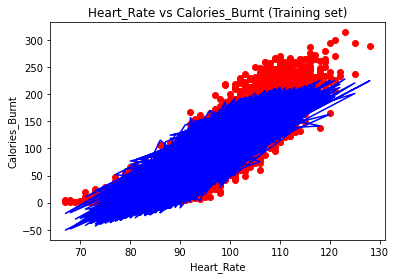

In [30]:
# Visualising the Training set results
plt.scatter(X_train['Heart_Rate'], y_train, color = 'red')
plt.plot(X_train['Heart_Rate'], lin_model.predict(X_train), color = 'blue')
plt.title('Heart_Rate vs Calories_Burnt (Training set)')
plt.xlabel('Heart_Rate')
plt.ylabel('Calories_Burnt')
plt.show()

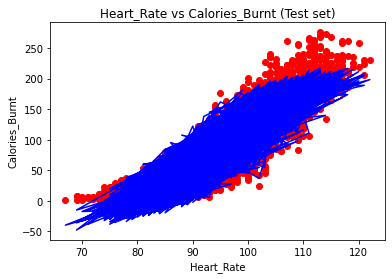

In [32]:
# Visualising the Test set results
plt.scatter(X_test['Heart_Rate'], y_test, color = 'red')
plt.plot(X_test['Heart_Rate'], lin_model.predict(X_test), color = 'blue')
plt.title('Heart_Rate vs Calories_Burnt (Test set)')
plt.xlabel('Heart_Rate')
plt.ylabel('Calories_Burnt')
plt.show()

In [33]:
Age = int(input('Enter the Age:'))
Height = int(input('Enter the height in cms.:'))
Duration = float(input('Enter the exercise durtion in min.:'))
Heart_rate = int(input('Enter the heart_rate in bpm:'))
readings = np.array([Age,Height,Duration,Heart_rate])
a = np.sum(np.dot(readings.T,coefficients))
bold_start = '\033[1m'
print(bold_start,"Calories burnt: ", a)

Enter the Age:21
Enter the height in cms.:178
Enter the exercise durtion in min.:20
Enter the heart_rate in bpm:120
 Calories burnt:  368.7907621331041
